In [110]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import sk_plotting_functions as spf
sys.path.insert(1, '../')
import SIKE
from post_processing import *
import json
import sike_plotting

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load in data

In [66]:
# Read in densities and create
rundeck64 = spf.SKRundeck('/Users/dpower/Documents/01 - PhD/14 - ELM investigation/01 - Runs/01 - Equilibria/02 - Kinetic/P_in = 64MW',sort_by='density')
rundeck128 = spf.SKRundeck('/Users/dpower/Documents/01 - PhD/15 - Reactor-relevant runs/02 - Kinetic',sort_by='density')
rundecks = [rundeck128]
powers = [64]
# densities = [[4,5,6,7,8,9,10,12,15,18]]
densities = [[2,3,10]]
sike_outdir = os.path.join('/Users/dpower/Documents/01 - PhD/10 - Impurities/SIKE Output', el)
# sikerun_names = [d for d in os.listdir(sike_outdir) if 'Output_RR_K_' in d]
sikerun_names = [d for d in os.listdir(sike_outdir) if 'Output_job_EQ_K64' in d]
sikeruns = []
el = 'Be'
for j,p in enumerate(powers):
    for k, n in enumerate(densities[j]):
        for i,sr in enumerate(sikerun_names):
            if '_' + str(n) + 'e19' in sr:
                skrun_name = sr
                skrun_idx = i
                break 
        # Initialise the SIKERun object
        sikerun_dir = sikerun_names[skrun_idx]
        solkitrun = rundecks[j].runs[k]
        solkitrun.load_dist()
        fe = solkitrun.data['DIST_F'][0] * solkitrun.n_norm / solkitrun.v_th ** 3
        vgrid = solkitrun.vgrid
        xgrid = solkitrun.xgrid
        with open(os.path.join(sike_outdir,sikerun_dir,el+'_opts.json')) as f:
            sike_opts = json.load(f)
        sikerun = SIKE.SIKERun(xgrid=xgrid, fe=fe, vgrid=vgrid, opts = sike_opts)
        
        # Set the sikerun equilibrium densities
        dens_file = os.path.join(sike_outdir,sikerun_dir,el+'_dens.txt')
        dens_Max_file = os.path.join(sike_outdir,sikerun_dir,el+'_dens_Max.txt')
        sikerun.impurities[el].dens = np.loadtxt(dens_file)
        sikerun.impurities[el].dens_Max = np.loadtxt(dens_Max_file)
        sikeruns.append(sikerun)
        

Initialising the impurity species to be modelled...
 Initialising states...
 Initialising transitions...
  Loading transitions from json...
  Creating transition objects...
  Creating data for inverse transitions...
  Performing checks on transition data...
 Initialising densities...
 Finalising states...
Finished initialising impurity species objects.
Initialising the impurity species to be modelled...
 Initialising states...
 Initialising transitions...
  Loading transitions from json...
  Creating transition objects...
  Creating data for inverse transitions...
  Performing checks on transition data...
 Initialising densities...
 Finalising states...
Finished initialising impurity species objects.
Initialising the impurity species to be modelled...
 Initialising states...
 Initialising transitions...
  Loading transitions from json...
  Creating transition objects...
  Creating data for inverse transitions...
  Performing checks on transition data...
 Initialising densities...
 Fina

# Single run comparisons

In [126]:
r = sikeruns[-1]

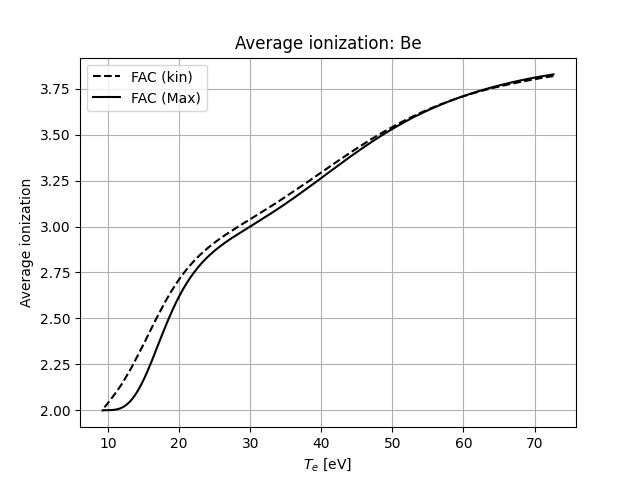

In [127]:
# Compare Zavg
sike_plotting.plot_Zavg(r,el)

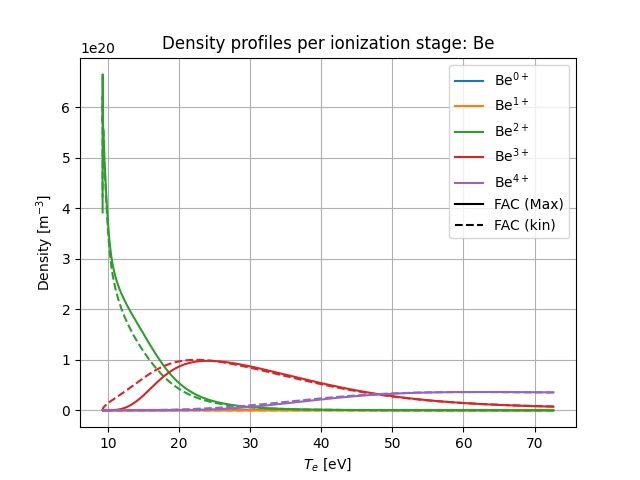

In [128]:
# Compare Z dens
sike_plotting.plot_Z_dens(r,el)

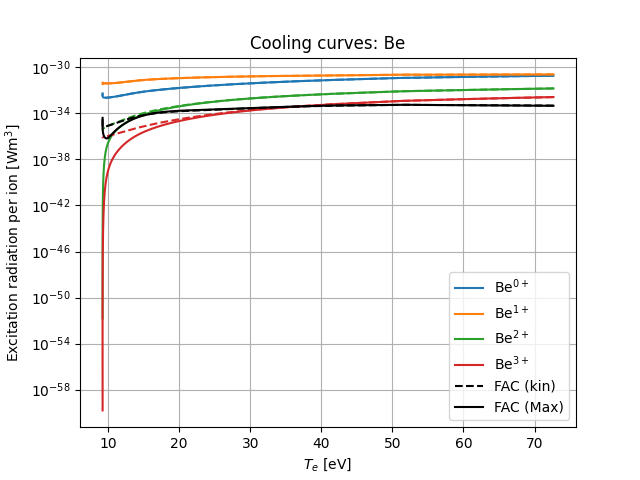

In [129]:
# Plot PLTs
sike_plotting.plot_PLTs(r,el)

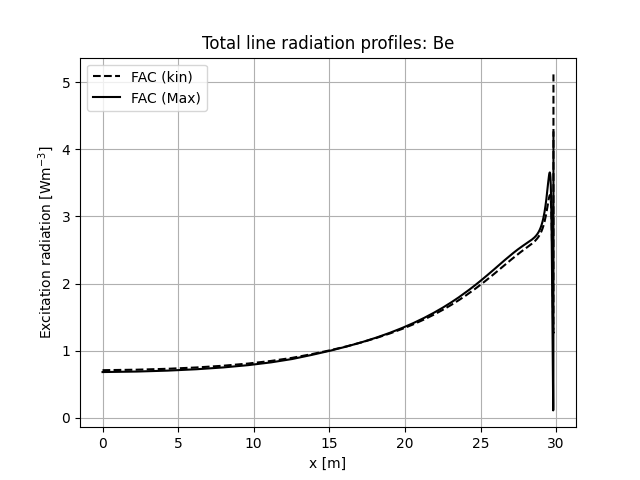

In [130]:
# Plot radiative losses
sike_plotting.plot_rad_profile(r,el)

In [133]:
sikeruns[-1].opts['delta_t'] *= 100
sikeruns[-1].run()

Filling kinetic transition matrix for Be...
 100.0%
Computing densities with kinetic electrons for Be...
Evolving with: bcgs , preconditioner:  bjacobi
TIMESTEP 60 | max(dn/dt) 8.79e+19 | NUM_ITS 2            
Conservation check on rank 0: 7.36e-02
Filling Maxwellian transition matrix for Be...
 100.0%
Computing densities with Maxwellian electrons for Be...
Evolving with: bcgs , preconditioner:  bjacobi
TIMESTEP 60 | max(dn/dt) 1.07e+20 | NUM_ITS 2            
Conservation check on rank 0: 1.07e-01
